In [258]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm

In [259]:
sales=[50,70,88,112,120,135,150]
price=[7.5,6.0,5.8,5.0,4.5,4.0,3.7]
adcost=[35,40,45,50,55,68,75]

data=pd.DataFrame([sales,price,adcost],['Sales','Price','Adcost']).T

In [260]:
data.head()

,Sales,Price,Adcost
0,50.0,7.5,35.0
1,70.0,6.0,40.0
2,88.0,5.8,45.0
3,112.0,5.0,50.0
4,120.0,4.5,55.0


In [261]:
# in Regression we first check for linear relation ship between varaibles

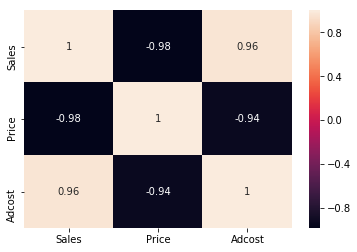

In [262]:
sns.heatmap(data.corr(),annot=True)

In [263]:
np.corrcoef(data.Price,data.Sales)

array([[ 1.        , -0.98266754],
       [-0.98266754,  1.        ]])

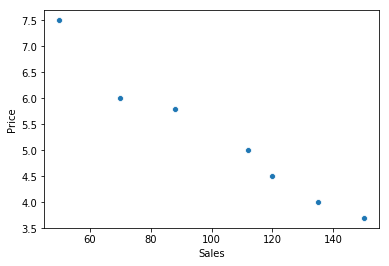

In [264]:
sns.scatterplot(x=data.Sales,y=data.Price)

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


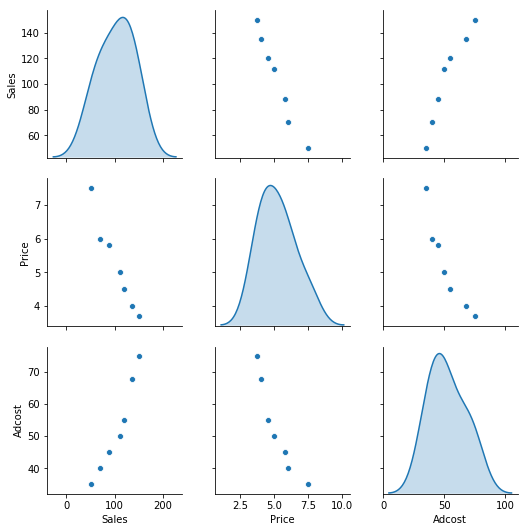

In [265]:
sns.pairplot(data,diag_kind='kde')

In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split

# Model 1

In [267]:

x=data.iloc[:,1]
y=data.iloc[:,0]

#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [268]:
lm=LinearRegression()
lm.fit(pd.DataFrame(x),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [269]:
ypred=lm.predict(pd.DataFrame(x))

In [270]:
ypred


array([ 42.67808592,  82.63934203,  87.96750952, 109.28017945,
       122.60059815, 135.92101686, 143.91326808])

In [271]:
lm.coef_

array([-26.64083741])

In [272]:
lm.intercept_

242.4843665035345

In [273]:
lm.score(pd.DataFrame(x),pd.DataFrame(y))   

0.9656355024522724

In [274]:
from sklearn.metrics import r2_score
r2_score(y,ypred) 

0.9656355024522724

In [275]:
R2=1-np.sum((y-ypred)**2)/np.sum((y-np.mean(y))**2)

In [276]:
R2

0.9656355024522724

In [277]:
rmse=np.sqrt(np.sum((y-ypred)**2)/len(y))

In [278]:
rmse      # Rmse score should be low

6.157707836881902

# Model 2

In [279]:
x=data.iloc[:,2]
y=data.iloc[:,0]
lm=LinearRegression()
lm.fit(pd.DataFrame(x),y)
ypred=lm.predict(pd.DataFrame(x))

In [280]:
ypred

array([ 61.96109123,  73.80143113,  85.64177102,  97.48211091,
       109.32245081, 140.10733453, 156.68381038])

In [281]:
r2_score(y,ypred) 

0.9276750598403978

In [282]:
lm.intercept_

-20.921288014311244

In [283]:
lm.coef_

array([2.36806798])

# Model 3                                                                                                                                                                                                                                      

In [284]:
x=data.iloc[:,[1,2]]
y=data.iloc[:,0]
lm=LinearRegression()
lm.fit(pd.DataFrame(x),y)
ypred=lm.predict(pd.DataFrame(x))

In [285]:
r2_score(y,ypred) 

0.981227597252123

In [286]:
rmse=np.sqrt(np.sum((y-ypred)**2)/len(y))

In [287]:
rmse

4.551179992688849

# Interaction Term

In [288]:
newcol=data.Price*data.Adcost

In [289]:
x=pd.concat([x,newcol],axis=1)

In [290]:
x.columns=['Price','ad_cost','Price:Ad_cost']

In [291]:
x

,Price,ad_cost,Price:Ad_cost
0,7.5,35.0,262.5
1,6.0,40.0,240.0
2,5.8,45.0,261.0
3,5.0,50.0,250.0
4,4.5,55.0,247.5
5,4.0,68.0,272.0
6,3.7,75.0,277.5


In [292]:
x=x
y=data.iloc[:,0]
lm=LinearRegression()
lm.fit(pd.DataFrame(x),y)
ypred=lm.predict(pd.DataFrame(x))

In [293]:
r2_score(y,ypred) 

0.9845335489184767

In [294]:
rmse=np.sqrt(np.sum((y-ypred)**2)/len(y))
rmse

4.131040152096988

In [295]:
lm.intercept_

133.7871665483524

In [296]:
lm.coef_

array([-27.01700412,  -0.20744374,   0.47000816])

In [297]:
# Sales = 133.78 - 27.01 * Price - 0.20 * ad_cost + 0.47 * Price:Ad_cost

#for Price=20

# sales= 133.78 - 27.01 * Price - 0.20 * ad_cost + 0.47 * Price:Ad_cost
#      = 133.78 - 540.2 - 0.20 * ad_cost +  (0.47*20)Ad_cost
#      = 133.78 - 540.2 - 0.20 * ad_cost +  9.39 Ad_cost

# if we are keeping the price at 20 what is the adv cost we need to spend to geta sales of 70

# Example 2

In [298]:
data=pd.read_csv('Advertising.csv')

In [299]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [300]:
del(data['Unnamed: 0'])

In [301]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [302]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


##### We donot consider Newspaper because it does not have a linear relationship with sales

In [303]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


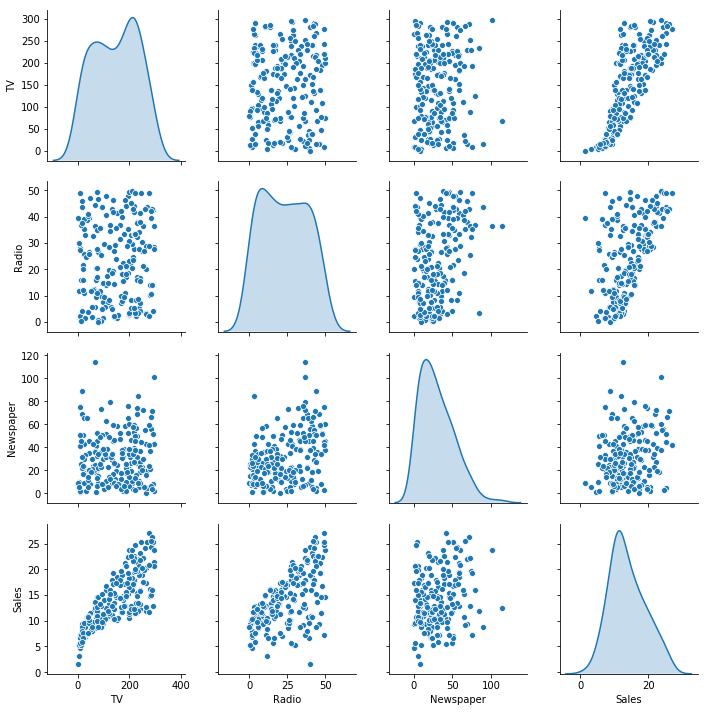

In [304]:
sns.pairplot(data,diag_kind='kde')

In [305]:
x=data.iloc[:,0]
y=data.iloc[:,3]

#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [306]:
lm=LinearRegression()
lm.fit(pd.DataFrame(x),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [307]:
ypred=lm.predict(pd.DataFrame(x))

In [308]:
lm.coef_

array([0.04753664])

In [309]:
lm.intercept_

7.032593549127693

In [310]:
r2_score(y,ypred) 

0.611875050850071

In [311]:
rmse=np.sqrt(np.sum((y-ypred)**2)/len(y))
rmse

3.2423221486546887

In [317]:
x=data.iloc[:,1]
y=data.iloc[:,3]
lm=LinearRegression()
lm.fit(pd.DataFrame(x),y)
ypred=lm.predict(pd.DataFrame(x))


In [318]:
lm.coef_

array([0.20249578])

In [319]:
lm.intercept_

9.311638095158283

In [320]:
r2_score(y,ypred) 

0.33203245544529525

In [321]:
rmse=np.sqrt(np.sum((y-ypred)**2)/len(y))
rmse

4.2535159274564185

In [327]:
x=data.iloc[:,[0,1]]
y=data.iloc[:,3]
lm=LinearRegression()
lm.fit(pd.DataFrame(x),y)
ypred=lm.predict(pd.DataFrame(x))

In [328]:
lm.coef_

array([0.04575482, 0.18799423])

In [329]:
lm.intercept_

2.9210999124051362

In [330]:
r2_score(y,ypred) 

0.8971942610828956

In [331]:
rmse=np.sqrt(np.sum((y-ypred)**2)/len(y))
rmse

1.668703059366193

# With Interaction Term

In [346]:
newcol=data.TV*data.Radio

In [347]:
x=pd.concat([x,newcol],axis=1)

In [348]:
x.columns=['TV','Radio','TV:Radio']


In [349]:
x=x
y=data.iloc[:,3]
lm=LinearRegression()
lm.fit(pd.DataFrame(x),y)
ypred=lm.predict(pd.DataFrame(x))

In [350]:
lm.coef_

array([0.01910107, 0.02886034, 0.00108649])

In [351]:
lm.intercept_

6.750220203075112

In [372]:
from statsmodels.api import add_constant
X2 = add_constant(x)
lm= sm.OLS(y,X2)

lm2=lm.fit()
lm2.pvalues


const       1.541461e-68
TV          2.363605e-27
Radio       1.400461e-03
TV:Radio    2.757681e-51
dtype: float64

In [373]:
lm2.params

const       6.750220
TV          0.019101
Radio       0.028860
TV:Radio    0.001086
dtype: float64

In [353]:
lm2.summary()   # the top portion is should be compared with that with other models, the middle portion is should not be compared with other

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 10 Jan 2019   Prob (F-statistic):          6.68e-146
Time:                        13:02:35   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [369]:
lm= sm.ols('Sales~TV+Radio',data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           4.83e-98
Time:                        13:13:09   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [377]:
6.75+(0.019*50)+(0.0286*50)+0.001086*(50*50) # if we spend 50 on TV and 50 on Radio

11.845

In [434]:
A=pd.DataFrame({'exp':[2.5,3.0,5.7,4.8,7.0,12,8],'g':[0,1,0,1,1,0,1],'sal':[6500,8000,4000,12000,10000,15000,6000]})


In [409]:
A

,exp,g,sal
0,2.5,0,6500
1,3.0,1,8000
2,5.7,0,4000
3,4.8,1,12000
4,7.0,1,10000
5,12.0,0,15000
6,8.0,1,6000


In [410]:
A.corr()

,exp,g,sal
exp,1.000000,-0.169600,0.549424
g,-0.169600,1.000000,0.070215
sal,0.549424,0.070215,1.000000


In [439]:
x=A.iloc[:,0:2]
y=A.sal
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [412]:
ypred=lm.predict(x)

In [413]:
lm.intercept_


3951.6772732175596

In [414]:
lm.coef_

array([ 675.49347427, 1198.00992342])

In [415]:
r2_score(y,ypred) 

0.3293557401097087

In [416]:
rmse=np.sqrt(np.sum((y-ypred)**2)/len(y))
rmse

2885.880589773859

In [417]:
A.sal.mean()      # Baseline Model

8785.714285714286

In [418]:
rmse=np.sqrt(np.sum((y-A.sal.mean())**2)/len(y))   # Baseline Model
rmse

3523.9703952982886

In [438]:
x=A.iloc[:,0:1]
y=A.sal
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [420]:
ypred=lm.predict(x)

In [421]:
lm.intercept_

4841.108068064473

In [422]:
lm.coef_

array([642.14519822])

In [423]:
rmse=np.sqrt(np.sum((y-ypred)**2)/len(y))
rmse


2944.4321931005506

In [440]:
newcol=A.g*A.exp

In [441]:
x=pd.concat([x,newcol],axis=1)

In [442]:
x.columns=['exp','g','exp:g']

In [443]:
y=A.sal
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [430]:
ypred=lm.predict(x)

In [444]:
lm.intercept_

1676.8440576401808

In [445]:
lm.coef_

array([ 1013.33999144,  9439.86681769, -1384.69277659])

In [446]:
# the Interaction term in case of classification variable doesnt make sense  